Air Quality Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
#Step 1 : Data Acquisition
df = pd.read_csv('/content/air_quality.csv')
df.head()

,datetime,city,country,pm25,no2,so2,co,o3
0,2024-01-01 08:00:00,Delhi,India,143.2,58.4,12.1,0.7,19.3
1,2024-01-01 08:00:00,Beijing,China,189.4,47.2,18.3,1.2,25.4
2,2024-01-01 08:00:00,New York,USA,32.5,22.0,4.1,0.3,38.2
3,2024-01-01 08:00:00,London,UK,18.3,30.4,3.9,0.2,44.1
4,2024-01-01 08:00:00,Sydney,Australia,10.1,14.3,2.1,0.1,31.7


In [ ]:
#step 2 : Inspect the data
print(df.describe())
print(df.info())

             pm25        no2        so2         co         o3
count   10.000000  10.000000  10.000000  10.000000  10.000000
mean    73.630000  37.130000   8.260000   0.540000  31.010000
std     62.245501  17.539356   5.646867   0.377712  10.025351
min     10.100000  14.300000   2.100000   0.100000  17.600000
25%     23.775000  23.375000   3.925000   0.225000  22.100000
50%     53.950000  32.200000   5.950000   0.450000  30.550000
75%    117.275000  53.050000  11.925000   0.775000  40.225000
max    189.400000  63.200000  18.300000   1.200000  44.100000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  10 non-null     object 
 1   city      10 non-null     object 
 2   country   10 non-null     object 
 3   pm25      10 non-null     float64
 4   no2       10 non-null     float64
 5   so2       10 non-null     float64
 6   co        10 non-null   

In [ ]:
#Step 3: Data Cleaning
print(df.isnull().sum())
df['datetime'] = pd.to_datetime(df['datetime'],errors='coerce')
df.info()

datetime    0
city        0
country     0
pm25        0
no2         0
so2         0
co          0
o3          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  10 non-null     datetime64[ns]
 1   city      10 non-null     object        
 2   country   10 non-null     object        
 3   pm25      10 non-null     float64       
 4   no2       10 non-null     float64       
 5   so2       10 non-null     float64       
 6   co        10 non-null     float64       
 7   o3        10 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 772.0+ bytes


In [ ]:
#step 5: Feature Engineering
def categorize_pm25(value):
  if value <= 12:
    return 'Good'
  elif value <= 35.4:
    return 'Moderate'
  elif value <= 55.4:
    return 'Unhealthy for Sensitive Groups'
  elif value <= 150.4:
    return 'Unhealthy'
  elif value <= 250.4:
    return 'Very unhealthy'
  else:
    return 'Hazardous'

In [ ]:
df['pm25_categorize'] = df['pm25'].apply(categorize_pm25)
df.head()

,datetime,city,country,pm25,no2,so2,co,o3,pm25_categorize
0,2024-01-01 08:00:00,Delhi,India,143.2,58.4,12.1,0.7,19.3,Unhealthy
1,2024-01-01 08:00:00,Beijing,China,189.4,47.2,18.3,1.2,25.4,Very unhealthy
2,2024-01-01 08:00:00,New York,USA,32.5,22.0,4.1,0.3,38.2,Moderate
3,2024-01-01 08:00:00,London,UK,18.3,30.4,3.9,0.2,44.1,Moderate
4,2024-01-01 08:00:00,Sydney,Australia,10.1,14.3,2.1,0.1,31.7,Good


In [ ]:
#step 6: Standardization
scaler = StandardScaler()
df[['pm25_scaled']] = scaler.fit_transform(df[['pm25']])
df.head()

,datetime,city,country,pm25,no2,so2,co,o3,pm25_categorize,pm25_scaled
0,2024-01-01 08:00:00,Delhi,India,143.2,58.4,12.1,0.7,19.3,Unhealthy,1.178129
1,2024-01-01 08:00:00,Beijing,China,189.4,47.2,18.3,1.2,25.4,Very unhealthy,1.960500
2,2024-01-01 08:00:00,New York,USA,32.5,22.0,4.1,0.3,38.2,Moderate,-0.696513
3,2024-01-01 08:00:00,London,UK,18.3,30.4,3.9,0.2,44.1,Moderate,-0.936982
4,2024-01-01 08:00:00,Sydney,Australia,10.1,14.3,2.1,0.1,31.7,Good,-1.075845


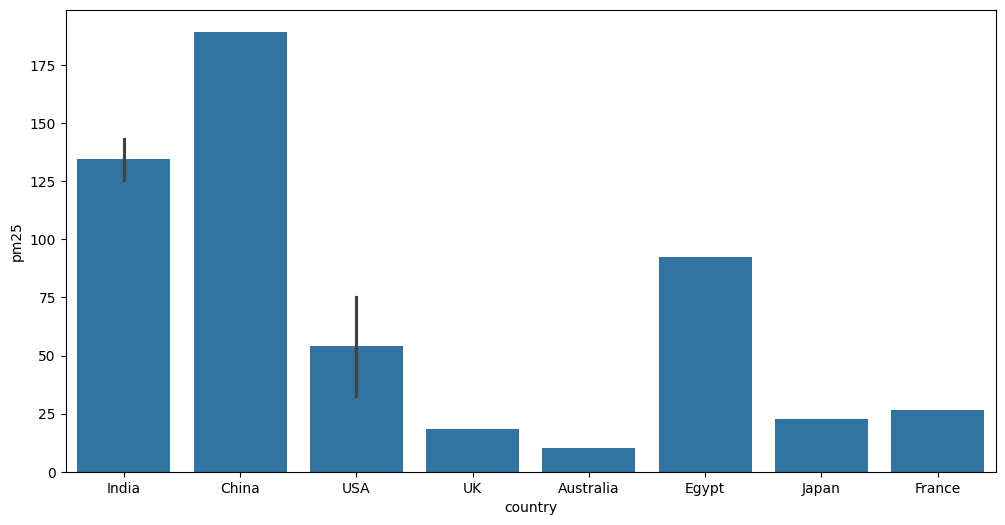

In [ ]:
#Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='country',y='pm25')
plt.show()